In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scipy.io
import seaborn as sns

In [2]:
move_mat = scipy.io.loadmat( "movepolicy_planner.mat")

lowz_planner = pd.DataFrame(move_mat["lowz_planner"])

lowz_ce = pd.DataFrame(move_mat["lowz_ce"])

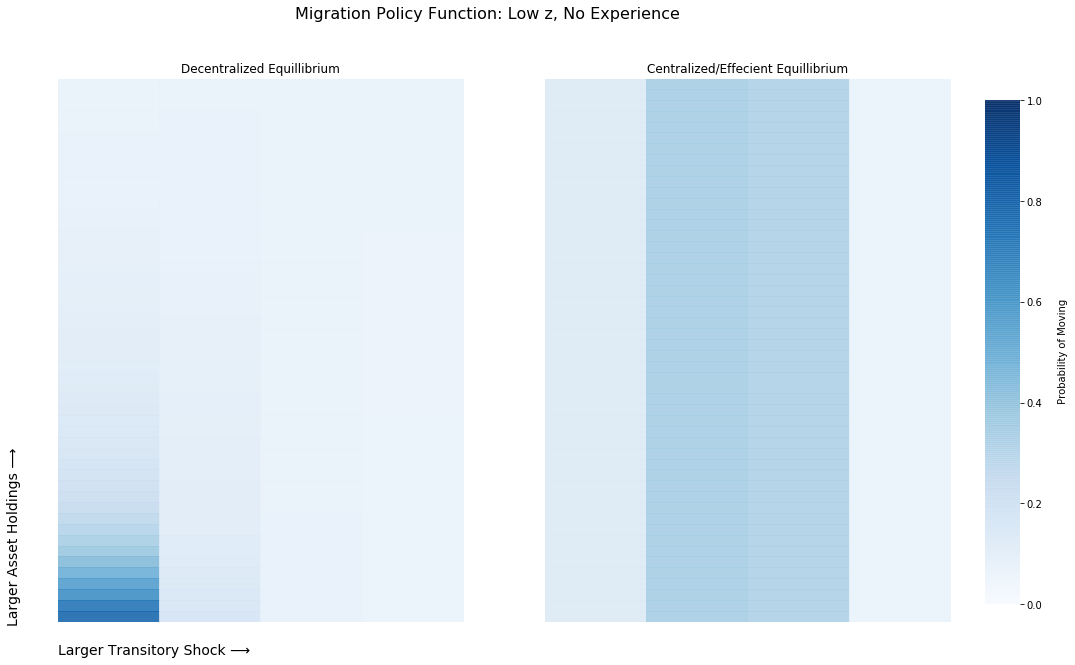

In [11]:
fig, ax = plt.subplots(1,2,figsize = (16,10))

cbar_ax = fig.add_axes([.93, .15, .03, 0.70])

sns.heatmap((1-lowz_ce).iloc[50:100,0:4], cmap="Blues",cbar = False,vmin=0,vmax=1.0, ax=ax[0], alpha = 0.90)

sns.heatmap((1-lowz_planner).iloc[50:100,0:4], cmap="Blues",cbar = True,vmin=0,vmax=1.0, ax=ax[1],
            cbar_kws={'label': '\n Probability of Moving'}, 
             cbar_ax = cbar_ax, alpha = 0.90)

label_list = ["Decentralized Equillibrium", "Centralized/Effecient Equillibrium"]

count = 0

for xxx in ax:
    
    xxx.get_xaxis().set_visible(False)
    xxx.get_yaxis().set_visible(False)
    
    xxx.set_title(label_list[count])
    
    count = count + 1

ax[0].text(-0.5, 50, "Larger Asset Holdings ⟶ ",fontsize = 14, rotation = 90)

ax[0].text(0, 53, "Larger Transitory Shock ⟶ ",fontsize = 14)

fig.suptitle("Migration Policy Function: Low z, No Experience \n", fontsize = 16)

#fig_path = "C:\\github\\welfare_migration\\slides\\TALK-FIGURES\\"

plt.savefig("migration_policy_planner.png", bbox_inches = "tight")

plt.show()